# Pymaceuticals Inc.
---
### Analysis
- Looking at the summary statistics of each drug, Capomulin and Ramicane seem to be the only effective treatments as these are the only treatments displaying a mean tumor volume significantly lower than Placebo. Other treatments are within standard error of Placebo and likely do not actually have an effect. Ramicane does have a slighlty lower mean tumor volume than Capomulin but the standard errors overlap so this may be due to chance, the two treatments seem to have similar effect.


- The study contains roughly similar number of male and female mice so the observed effects of the drugs are likely true regardless of gender.


- The box plots for final tumor volume for the drug regimens further coroborate the effectiveness of Capomulin and Ramicane as these are lower than the other drug regimens and there are no outliers that may be skewing the data. Once again Capomulin and Ramicane show similar effectiveness.


- Taking a mouse under the Capomulin regimen, we can see the reduction in tumor volume with time in a line graph, an example of the effectiveness of Capomulin.


- Looking at the regression model and calculated correlation, tumor volume is correlated with the weight of the mice, perhaps a larger dose is necessary for larger mice.

### Conclusion
Capomulin and Ramicane are effective in reducing tumor volume in the mice, they have similar effects.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
# Study data files
mouse_metadata_path = "Data/Mouse_metadata.csv"
study_results_path = "Data/Study_results.csv"

# Reading the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combining the data into a single dataset
combined_mouse_data = pd.merge(study_results, mouse_metadata, how='left', on='Mouse ID')

# Displaying the data table for preview
combined_mouse_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of unique mice by ID.
len(combined_mouse_data['Mouse ID'].unique())

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_rows = combined_mouse_data[combined_mouse_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
duplicate_rows['Mouse ID'].unique()

array(['g989'], dtype=object)

In [4]:
# Collecting all data for the duplicate mouse ID
duplicate_mouseID = duplicate_rows['Mouse ID'].unique()[0]
duplicate_mouse_data = combined_mouse_data.loc[combined_mouse_data['Mouse ID'] == duplicate_mouseID]
duplicate_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Dropping duplicate mouse by ID to create clean DataFrame
combined_data_clean = pd.DataFrame(combined_mouse_data.loc[combined_mouse_data['Mouse ID'] != duplicate_mouseID])
combined_data_clean.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking number of mice in clean DataFrame
len(combined_data_clean['Mouse ID'].unique())

248

## Summary Statistics

In [7]:
# Grouping data by drug regimen
by_regimen = combined_data_clean.groupby('Drug Regimen')

# Calculating mean, median, variance, standard deviation, and SEM of the tumor volume
tumor_vol_mean = by_regimen.mean()['Tumor Volume (mm3)']
tumor_vol_median = by_regimen.median()['Tumor Volume (mm3)']
tumor_vol_variance = by_regimen.var()['Tumor Volume (mm3)']
tumor_vol_std_dev = by_regimen.std()['Tumor Volume (mm3)']
tumor_vol_std_err = by_regimen.sem()['Tumor Volume (mm3)']

# Creating new DataFrame from the series
tumor_vol_stats = pd.DataFrame({'Mean Tumor Volume': tumor_vol_mean, 'Median Tumor Volume': tumor_vol_median,
                               'Tumor Volume Variance': tumor_vol_variance, 'Tumor Volume Std. Dev.': tumor_vol_std_dev,
                               'Tumor Volume Std. Err.': tumor_vol_std_err})

# Displaying tumor volume statistics by drug regimen
tumor_vol_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Usinging the aggregation method to produce the same summary statistics in a single line.
tumor_vol_stats_using_agg = combined_data_clean.groupby('Drug Regimen').agg({'Tumor Volume (mm3)':['mean', 'median', 'var', 'std', 'sem']})

# Displaying Results
tumor_vol_stats_using_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<AxesSubplot:xlabel='Drug Regimen', ylabel='Number of Mice Tested'>

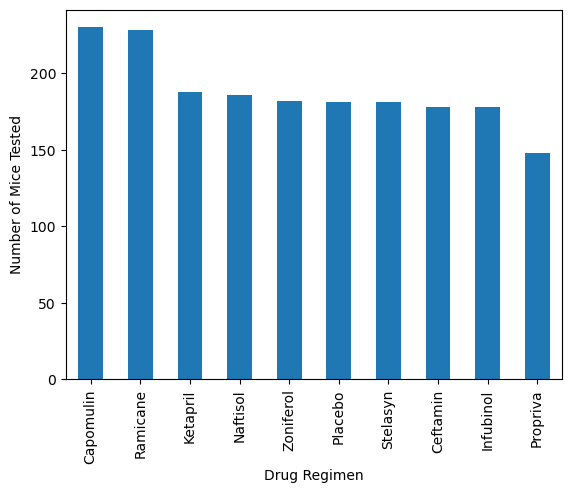

In [9]:
# Generating bar plot showing total number of timepoints for all mice tested for each drug regimen with Pandas
# Using previous drug regimen groupby object
timepoints_by_regimen = by_regimen['Timepoint'].count().sort_values(ascending=False)
timepoints_by_regimen.plot(kind='bar', ylabel='Number of Mice Tested')

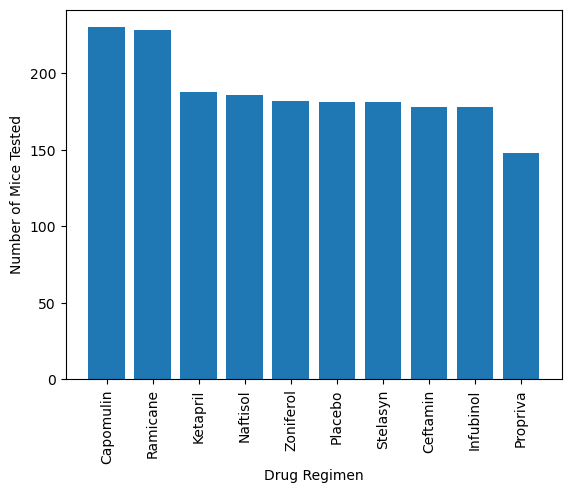

In [10]:
# Generating a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
# Creating sorted data frame from previous by drug regimen grouby object
by_regimen_sorted = by_regimen.count().sort_values(by='Timepoint', ascending=False)

# Setting up x axis and tick locations, setting positions of x labels and creating plot
x_axis = np.arange(len(by_regimen_sorted))
tick_locations = [x for x in x_axis]
labels = list(by_regimen_sorted.index)
plt.bar(x_axis, by_regimen_sorted['Timepoint'], alpha=1, align='center')
plt.xticks(tick_locations, labels, rotation='vertical')

# Adding axes labels
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice Tested')

# Displaying Graph
plt.show()

<AxesSubplot:ylabel='Sex'>

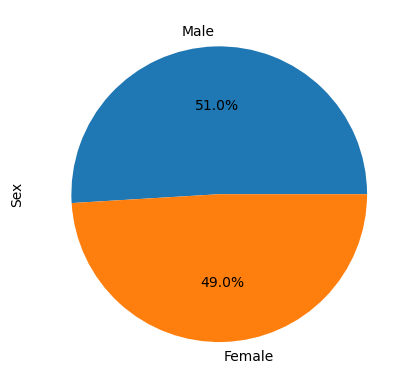

In [11]:
# Getting count of respective sexes in Data
sex_counts = combined_data_clean['Sex'].value_counts()

# Generating pie plot showing distribution of female vs male mice using pandas
sex_counts.plot(kind='pie', autopct="%1.1f%%")

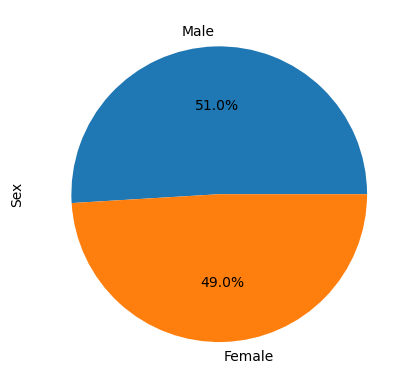

In [12]:
# Generating a pie plot showing the distribution of female versus male mice using pyplot

# Preparing labels and counts using previously established sex count series
counts = list(sex_counts)
category_labels = list(sex_counts.index)

# Setting up Pie Plot and Y label
plt.pie(counts, labels=category_labels, autopct="%1.1f%%")
plt.ylabel('Sex')

# Displaying Pie Plot
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculating final tumor volumes of mice across Capomulin, Ramicane, Infubinol, and Ceftamin treatment regimens
# Grouping data by Mouse ID and creating series with greatest timepoints for each mouse
grouped = combined_data_clean.groupby(['Mouse ID'])
max_timepoint_series = grouped['Timepoint'].max()
max_timepoint_series

# Merging series with the original DataFrame to find final tumor volume for each mouse
merged_df = pd.merge(max_timepoint_series, combined_data_clean, how='inner', on=['Mouse ID', 'Timepoint'])

In [14]:
# List of treatment regimens to use in for loop and plot labels
regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# List to collect tumor vol data
tumor_volumes = []

# Loop to add volumes to list and determine and print IQR and outliers for each regimen
for regimen in regimens:
    regimen_df = merged_df.loc[merged_df['Drug Regimen'] == regimen]
    current_volumes = regimen_df['Tumor Volume (mm3)']
    tumor_volumes.append(current_volumes)
    quartiles = current_volumes.quantile([.25,.5,.75])
    lowerquart = quartiles[0.25]
    upperquart = quartiles[0.75]
    IQR = upperquart-lowerquart
    lower_bound = lowerquart - (1.5*IQR)
    upper_bound = upperquart + (1.5*IQR)
    outliers = regimen_df.loc[(regimen_df['Tumor Volume (mm3)'] > upper_bound) | (regimen_df['Tumor Volume (mm3)'] < lower_bound)]
    print(f"{regimen} IQR is {IQR} \n{regimen}'s potential outliers: {outliers['Tumor Volume (mm3)']}")

Capomulin IQR is 7.781863460000004 
Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane IQR is 9.098536719999998 
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol IQR is 11.477135160000003 
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin IQR is 15.577752179999997 
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


{'whiskers': [<matplotlib.lines.Line2D at 0x237b4b046d0>,
 'caps': [<matplotlib.lines.Line2D at 0x237b4b04c70>,
 'boxes': [<matplotlib.lines.Line2D at 0x237b4b04400>,
 'medians': [<matplotlib.lines.Line2D at 0x237b4b17250>,
 'fliers': [<matplotlib.lines.Line2D at 0x237b4b17520>,
 'means': []}

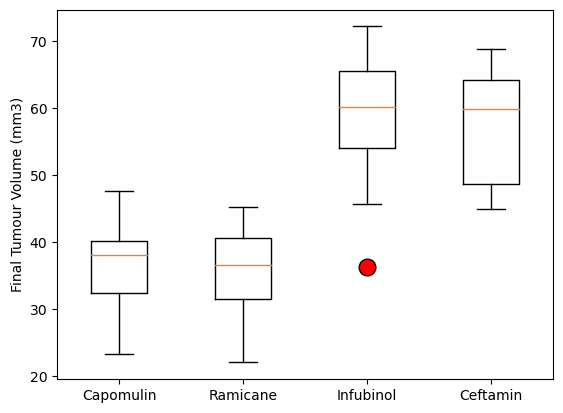

In [15]:
# Generating a box plot displaying distribution of tumor volume for each drug regimen
fig1, ax1 = plt.subplots()
ax1.set_ylabel('Final Tumour Volume (mm3)')
ax1.boxplot(tumor_volumes, labels=regimens, flierprops={'marker': 'o', 'markersize': 12, 'markerfacecolor': 'red'})

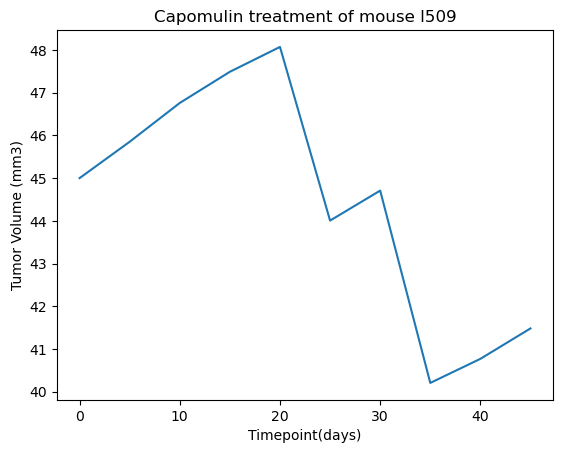

In [20]:
# Generating line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse_df = combined_data_clean.loc[combined_data_clean['Mouse ID']== 'l509']
mouse_df.plot(kind='line', x='Timepoint', y='Tumor Volume (mm3)', legend = False)

# Adding axes labels and title
plt.xlabel('Timepoint(days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin treatment of mouse l509')

# Displaying Line Graph
plt.show()

<AxesSubplot:xlabel='Weight (g)', ylabel='Average Tumor Volume (mm3)'>

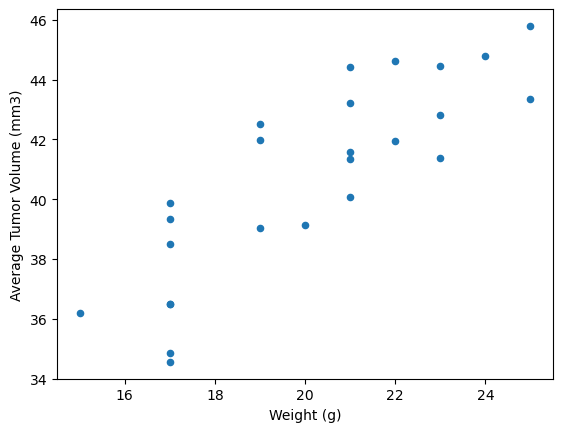

In [17]:
# Generating scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
# Grouping data by Mouse ID and calculating averages
capomulin_df = combined_data_clean.loc[combined_data_clean['Drug Regimen'] == 'Capomulin']
avg_df = capomulin_df.groupby('Mouse ID').mean()

# Setting up scatter plot
avg_df.plot(kind='scatter', x='Weight (g)', y='Tumor Volume (mm3)', ylabel= 'Average Tumor Volume (mm3)')

The correlation between mouse weight and the average tumor volume is 0.84


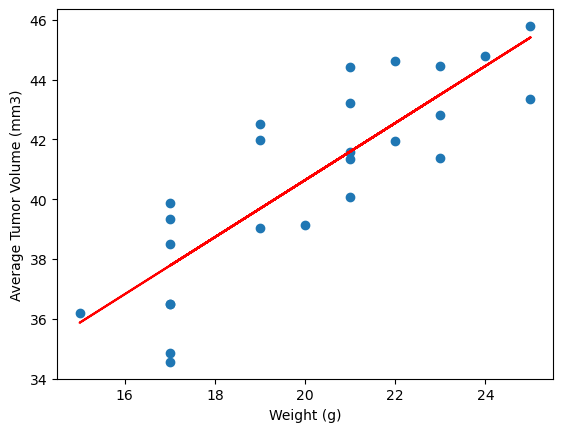

In [18]:
# Calculating the correlation coefficient between mouse weight and average tumor volume for Capomulin regimen
weight = avg_df['Weight (g)']
avg_tumor_vol = avg_df['Tumor Volume (mm3)']
correlation = round(st.pearsonr(weight,avg_tumor_vol)[0],2)

# Printing correlation
print(f'The correlation between mouse weight and the average tumor volume is {correlation}')

# Setting up scatter plot and linear regression model between mouse weight and average tumor volume for Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = linregress(weight, avg_tumor_vol)
regress_values = weight * slope + intercept
plt.scatter(weight, avg_tumor_vol)
plt.plot(weight, regress_values,'r-')

# Adding axes labels and displaying plot
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()